# Effect of Loan Characteristics on Borrower's APR
## by (Selasi Ayittah Randy)





## Investigation Overview


> I want to investigate the characteristics of loans that could be used to predict borrower's APR
The main interest was on the original loan, borrower rating , loan term and stated monthly income




## Dataset Overview

> The dataset comprises of several atttributes of 113,937 loans by borrowers. The attributes included  original loan, borrower rating , loan term and stated monthly income and manay maore.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan_sub = loan[cols]
# data wrangling, remove loans with missing borrower APR information
loan_sub = loan_sub[~loan_sub.BorrowerAPR.isna()]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)
loan_sub.shape

(113585, 6)

### The distribution of the Borrower APR 

The distribution of the APR is multimodal with several peak center at 0.1, 0.2, 0.3.
Very few loans have APR greater than 0.43

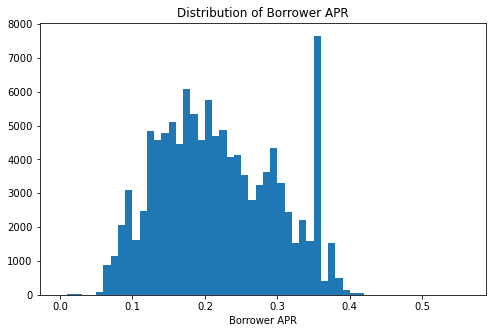

In [3]:
bins = np.arange(0, loan_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

### Distrirbution of Original Loan Amount
This distribution is multimodal with several peak at 10k,15k,20k and many more
Most of the loans are multiples of 1k

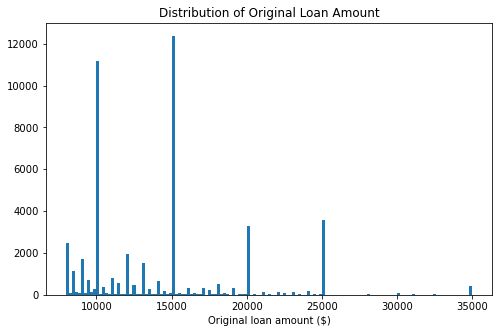

In [4]:
bins = np.arange(8000, loan_sub.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.title('Distribution of Original Loan Amount');

### Borrower APR vs. Loan Amount

The borrowe APR decreases with increase of loan amount in general.

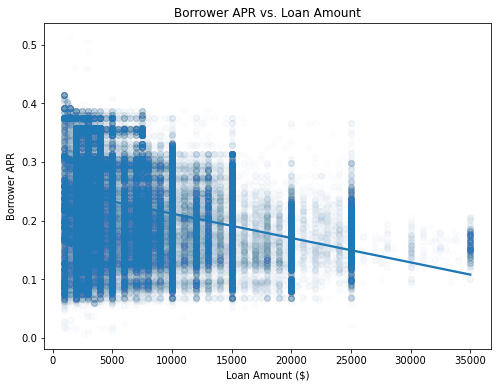

In [5]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

### Borrower APR vs. Prosper Rating
Prosper rating has a great effect on borrower APR.
Borrowers with best ratings have low APR.

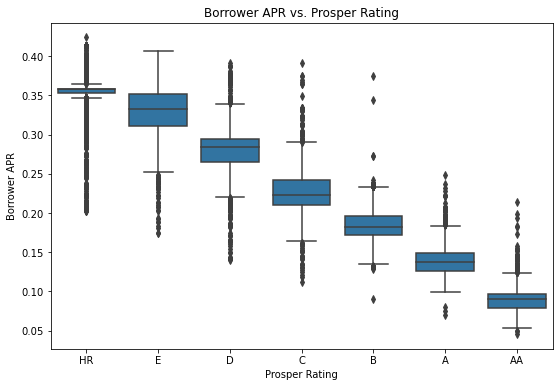

In [6]:
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=loan_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

### Prosper Rating Effect on Relationship between APR and Loan Amount
The loan amount increases with better rating. The borrower APR decreases with better rating.
The relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better


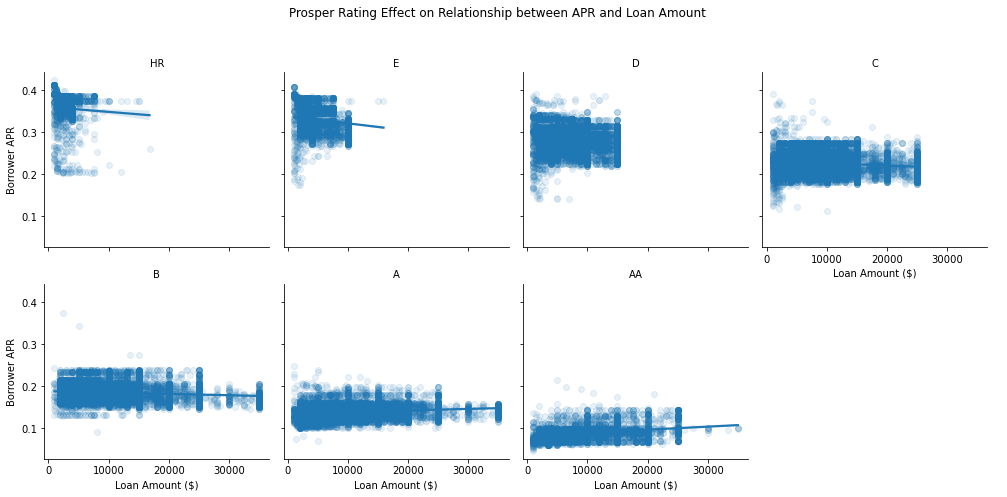

In [7]:
g=sb.FacetGrid(data=loan_sub,col='ProsperRating (Alpha)', height=3.5, col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between APR and Loan Amount');
plt.subplots_adjust(top=0.85)

In [8]:
! jupyter nbconvert slide_deck.ipynb -- to slides --post serve --template output_toggle 

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'slides' matched no files
[NbConvertApp] WARNING | pattern '--post' matched no files
[NbConvertApp] WARNING | pattern 'serve' matched no files
[NbConvertApp] WARNING | pattern '--template' matched no files
[NbConvertApp] WARNING | pattern 'output_toggle' matched no files
Traceback (most recent call last):
  File "C:\Users\SELASI\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SELASI\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\SELASI\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\SELASI\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\SELASI\Anaconda3\lib\site-package

In [9]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle


Traceback (most recent call last):
  File "C:\Users\SELASI\Anaconda3\lib\site-packages\traitlets\traitlets.py", line 537, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SELASI\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SELASI\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\SELASI\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\SELASI\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\SELASI\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 536, in convert_notebooks
    self.exporter = cls(config=s